<a href="https://colab.research.google.com/github/haseena-hassan/Women-Hackathon-Residential-Camp/blob/master/Svm_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902

[2 rows x 30 columns]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.61      1.00      0.76       105

    accuracy                           0.61       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.61      0.47       171

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2

[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.917, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.636, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.636, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished


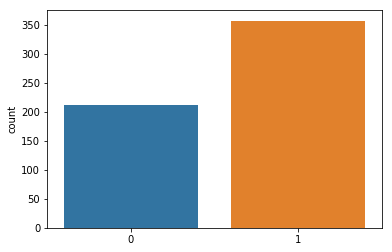

In [5]:
"""
Created on Sat Aug 31 15:33:56 2019

@author: haseena 
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset in avrisble 'cancer'
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

#load input feature as dataframe
df_features =pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#add output variable 'target' into dataframe
df_target = pd.DataFrame(cancer['target'],columns=['cancer'])
print(df_features.head(2))


sns.countplot(cancer['target'],label="Count")
#import train_test_split function to split data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df_features,np.ravel(df_target),test_size=0.30,random_state=101)

#import svc model and initiate it with empty variable
from sklearn.svm import SVC
model= SVC()

#train the model using fit method
model.fit(X_train,y_train)
predictions=model.predict(X_test)
from sklearn.metrics import classification_report
rep=print(classification_report(y_test,predictions))

#Grid search is used for getting optimal value for gamma and c
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

print('\n')
print('The best parameters are ',grid.best_params_)

grid_predictions=grid.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, grid_predictions))